In [996]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import numpy as np 
import pandas as pd 
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [998]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('Breast_Cancer.csv')

In [1000]:
df

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

In [1002]:
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [1004]:
num_col=df.select_dtypes(include=['float64','int']).columns

In [1006]:
cat_col=df.select_dtypes(exclude=['float64','int']).columns

In [1008]:
num_col,cat_col

(Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
        'Survival Months'],
       dtype='object'),
 Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
        'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
        'Progesterone Status', 'Status'],
       dtype='object'))

In [1010]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [1012]:
df.nunique()

Age                        40
Race                        3
Marital Status              5
T Stage                     4
N Stage                     3
6th Stage                   5
differentiate               4
Grade                       4
A Stage                     2
Tumor Size                110
Estrogen Status             2
Progesterone Status         2
Regional Node Examined     54
Reginol Node Positive      38
Survival Months           107
Status                      2
dtype: int64

In [1014]:
df.isnull().mean()*100

Age                       0.0
Race                      0.0
Marital Status            0.0
T Stage                   0.0
N Stage                   0.0
6th Stage                 0.0
differentiate             0.0
Grade                     0.0
A Stage                   0.0
Tumor Size                0.0
Estrogen Status           0.0
Progesterone Status       0.0
Regional Node Examined    0.0
Reginol Node Positive     0.0
Survival Months           0.0
Status                    0.0
dtype: float64

In [1016]:
df.dropna()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately differentiated     2  Regional          63        Positive   
3         Poorly differentiated     3  Regional          18        Positive   
4         Poorly differentiated     3  Regional          41        Positive   
...                         ...   ...       ...         ...             ...   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0               Positive                      24                      1   
1               Positive                      14                      5   
2               Positive                      14                      7   
3               Positive                       2                      1   
4               Positive                       3                      1   
...                  ...                     ...                    ...   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
0                  60  Alive  
1                  62  Alive  
2                  75  Alive  
3                  84  Alive  
4                  50  Alive  
...               ...    ...  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive  

[4024 rows x 16 columns]

In [1018]:
#df["Estrogen Status"].replace({1:"Positive", 0:"Negative"},inplace = True)
# df_new.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
# df_new.mnth = df_new.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
# df_new.weekday = df_new.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'weg',4: 'thu',5: 'fri',6: 'sat'})
# df_new.head()


In [1020]:
df[cat_col]

Race Marital Status T Stage  N Stage 6th Stage  \
0     White        Married       T1      N1       IIA   
1     White        Married       T2      N2      IIIA   
2     White       Divorced       T3      N3      IIIC   
3     White        Married       T1      N1       IIA   
4     White        Married       T2      N1       IIB   
...     ...            ...      ...     ...       ...   
4019  Other        Married       T1      N1       IIA   
4020  White       Divorced       T2      N2      IIIA   
4021  White        Married       T2      N1       IIB   
4022  Black       Divorced       T2      N1       IIB   
4023  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage Estrogen Status  \
0         Poorly differentiated     3  Regional        Positive   
1     Moderately differentiated     2  Regional        Positive   
2     Moderately differentiated     2  Regional        Positive   
3         Poorly differentiated     3  Regional        Positive   
4         Poorly differentiated     3  Regional        Positive   
...                         ...   ...       ...             ...   
4019  Moderately differentiated     2  Regional        Positive   
4020  Moderately differentiated     2  Regional        Positive   
4021  Moderately differentiated     2  Regional        Positive   
4022  Moderately differentiated     2  Regional        Positive   
4023  Moderately differentiated     2  Regional        Positive   

     Progesterone Status Status  
0               Positive  Alive  
1               Positive  Alive  
2               Positive  Alive  
3               Positive  Alive  
4               Positive  Alive  
...                  ...    ...  
4019            Positive  Alive  
4020            Positive  Alive  
4021            Negative  Alive  
4022            Positive  Alive  
4023            Positive  Alive  

[4024 rows x 11 columns]

In [1022]:
df[cat_col].nunique()

Race                   3
Marital Status         5
T Stage                4
N Stage                3
6th Stage              5
differentiate          4
Grade                  4
A Stage                2
Estrogen Status        2
Progesterone Status    2
Status                 2
dtype: int64

In [1024]:
df= pd.get_dummies(data=df,columns=['Race','Marital Status','differentiate'],dtype=int,drop_first=True)

In [1026]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Age                                  4024 non-null   int64 
 1   T Stage                              4024 non-null   object
 2   N Stage                              4024 non-null   object
 3   6th Stage                            4024 non-null   object
 4   Grade                                4024 non-null   object
 5   A Stage                              4024 non-null   object
 6   Tumor Size                           4024 non-null   int64 
 7   Estrogen Status                      4024 non-null   object
 8   Progesterone Status                  4024 non-null   object
 9   Regional Node Examined               4024 non-null   int64 
 10  Reginol Node Positive                4024 non-null   int64 
 11  Survival Months                      4024 n

In [1028]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1030]:
df[["T Stage ", "N Stage","6th Stage"]] = df[["T Stage ", "N Stage","6th Stage"]].apply(le.fit_transform)

In [1032]:
df

Age  T Stage   N Stage  6th Stage Grade   A Stage  Tumor Size  \
0      68         0        0          0     3  Regional           4   
1      50         1        1          2     2  Regional          35   
2      58         2        2          4     2  Regional          63   
3      58         0        0          0     3  Regional          18   
4      47         1        0          1     3  Regional          41   
...   ...       ...      ...        ...   ...       ...         ...   
4019   62         0        0          0     2  Regional           9   
4020   56         1        1          2     2  Regional          46   
4021   68         1        0          1     2  Regional          22   
4022   58         1        0          1     2  Regional          44   
4023   46         1        0          1     2  Regional          30   

     Estrogen Status Progesterone Status  Regional Node Examined  ...  Status  \
0           Positive            Positive                      24  ...   Alive   
1           Positive            Positive                      14  ...   Alive   
2           Positive            Positive                      14  ...   Alive   
3           Positive            Positive                       2  ...   Alive   
4           Positive            Positive                       3  ...   Alive   
...              ...                 ...                     ...  ...     ...   
4019        Positive            Positive                       1  ...   Alive   
4020        Positive            Positive                      14  ...   Alive   
4021        Positive            Negative                      11  ...   Alive   
4022        Positive            Positive                      11  ...   Alive   
4023        Positive            Positive                       7  ...   Alive   

      Race_Other Race_White  Marital Status_Married  Marital Status_Separated  \
0              0          1                       1                         0   
1              0          1                       1                         0   
2              0          1                       0                         0   
3              0          1                       1                         0   
4              0          1                       1                         0   
...          ...        ...                     ...                       ...   
4019           1          0                       1                         0   
4020           0          1                       0                         0   
4021           0          1                       1                         0   
4022           0          0                       0                         0   
4023           0          1                       1                         0   

      Marital Status_Single   Marital Status_Widowed  \
0                          0                       0   
1                          0                       0   
2                          0                       0   
3                          0                       0   
4                          0                       0   
...                      ...                     ...   
4019                       0                       0   
4020                       0                       0   
4021                       0                       0   
4022                       0                       0   
4023                       0                       0   

      differentiate_Poorly differentiated  differentiate_Undifferentiated  \
0                                       1                               0   
1                                       0                               0   
2                                       0                               0   
3                                       1                               0   
4                                       1                               0   
...                                   ...                             ..

In [1034]:
df["Status"].value_counts()

Status
Alive    3408
Dead      616
Name: count, dtype: int64

In [1036]:
df["Grade"].value_counts()

Grade
2                        2351
3                        1111
1                         543
 anaplastic; Grade IV      19
Name: count, dtype: int64

In [1038]:
df["Grade"]  = df["Grade"].map({'1': 1,'2':2,'3':3," anaplastic; Grade IV":4})

In [1040]:
df["Estrogen Status"]  = df["Estrogen Status"] .map({'Positive': 1, 'Negative': 0})

In [1042]:
df["Status"]  = df["Status"] .map({'Alive': 1, 'Dead': 0})

In [1044]:
df["Progesterone Status"].value_counts()

Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64

In [1046]:
df["A Stage"]  = df["A Stage"] .map({'Regional': 1, 'Distant': 0})

In [1048]:
df["Progesterone Status"]=df["Progesterone Status"] .map({'Positive':1,'Negative':0})

In [1050]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Age                                  4024 non-null   int64
 1   T Stage                              4024 non-null   int64
 2   N Stage                              4024 non-null   int64
 3   6th Stage                            4024 non-null   int64
 4   Grade                                4024 non-null   int64
 5   A Stage                              4024 non-null   int64
 6   Tumor Size                           4024 non-null   int64
 7   Estrogen Status                      4024 non-null   int64
 8   Progesterone Status                  4024 non-null   int64
 9   Regional Node Examined               4024 non-null   int64
 10  Reginol Node Positive                4024 non-null   int64
 11  Survival Months                      4024 non-null   int

In [1052]:
df["Status"].value_counts(normalize=True)*100

Status
1    84.691849
0    15.308151
Name: proportion, dtype: float64

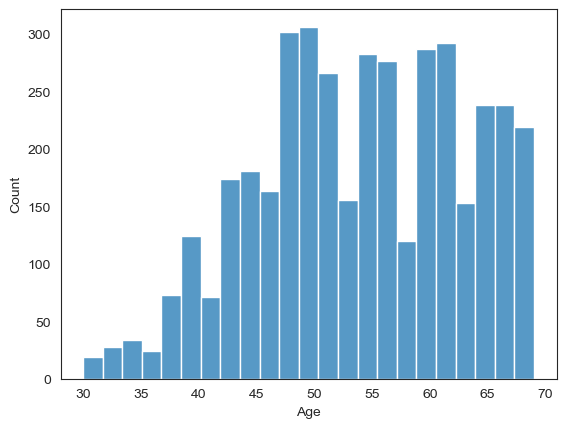

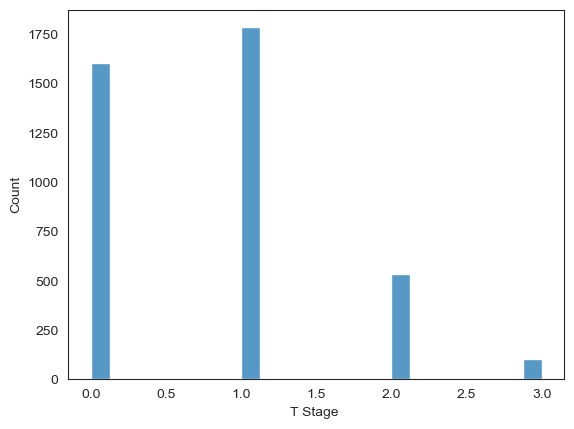

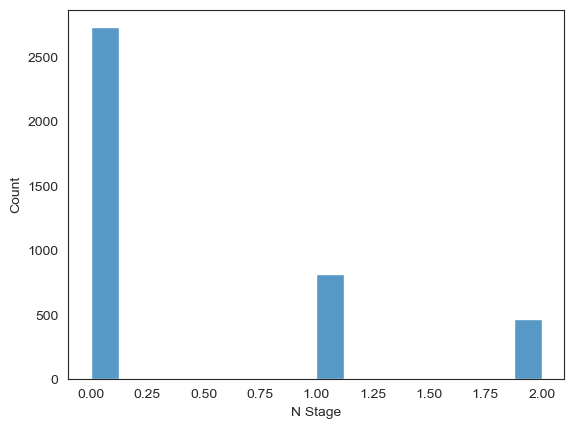

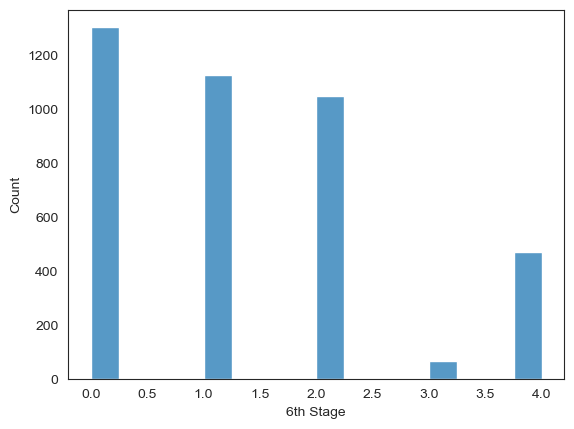

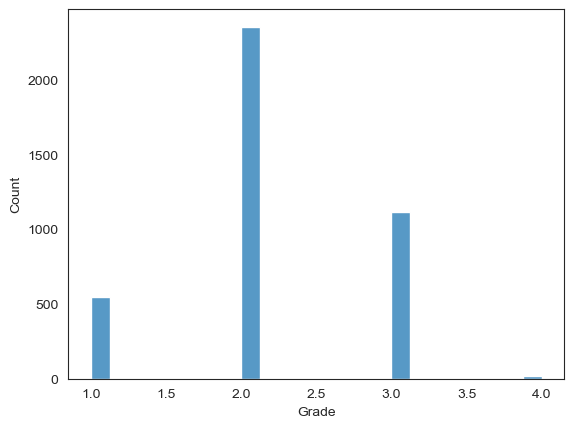

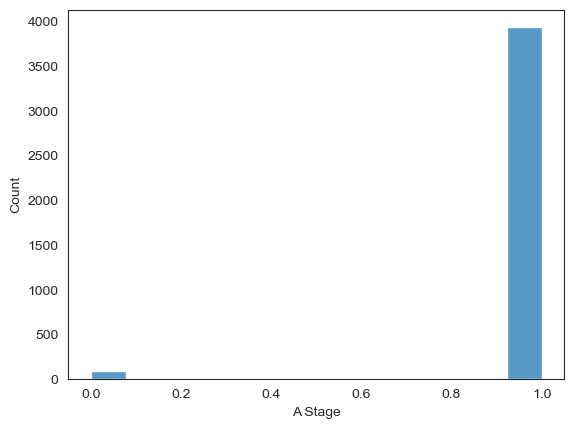

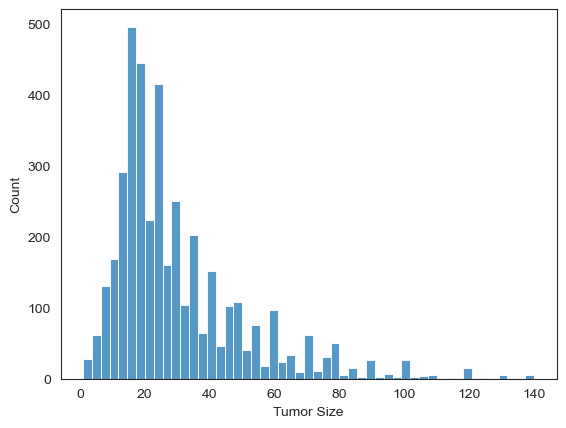

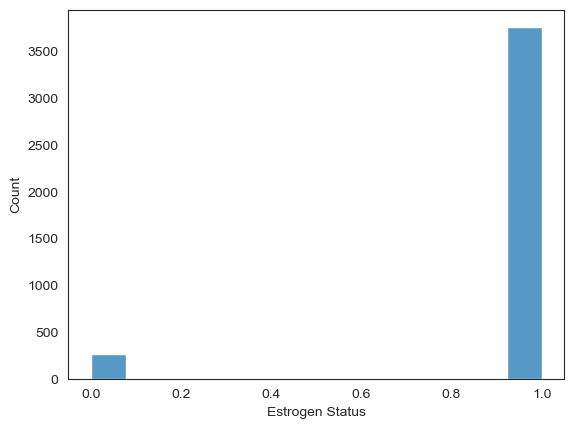

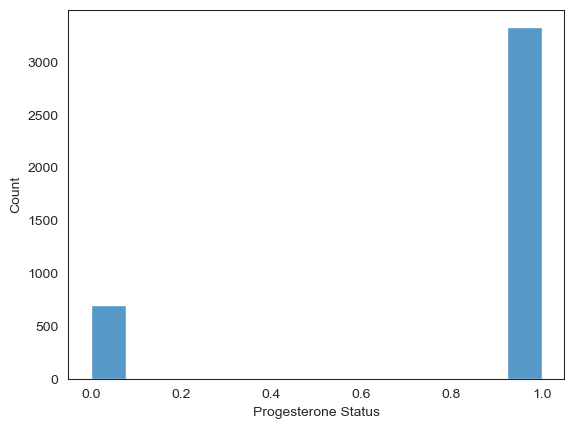

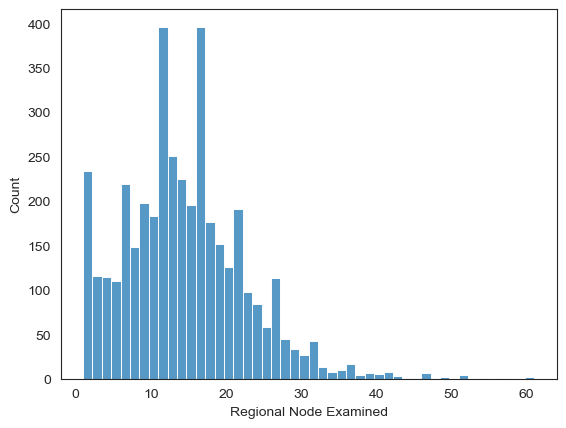

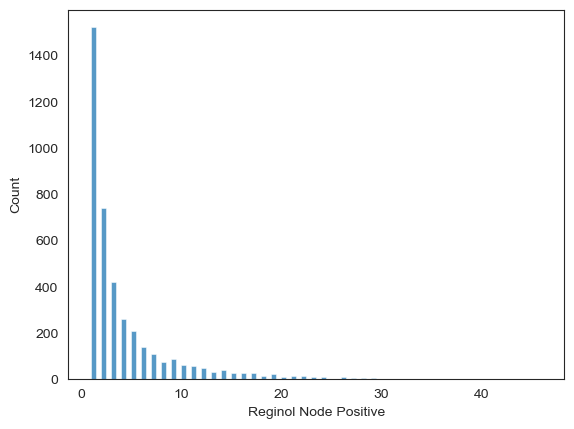

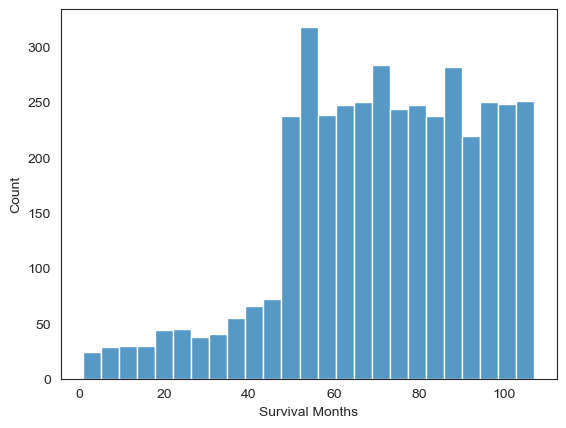

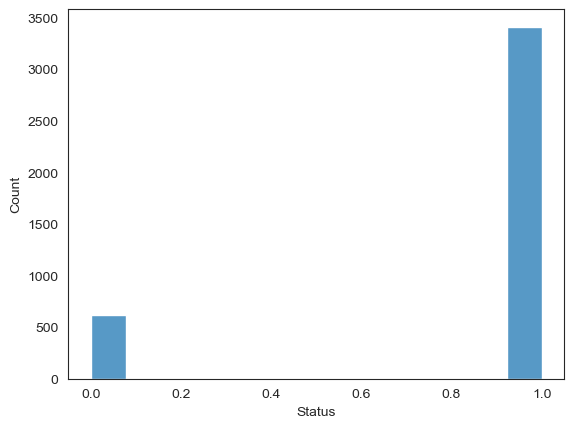

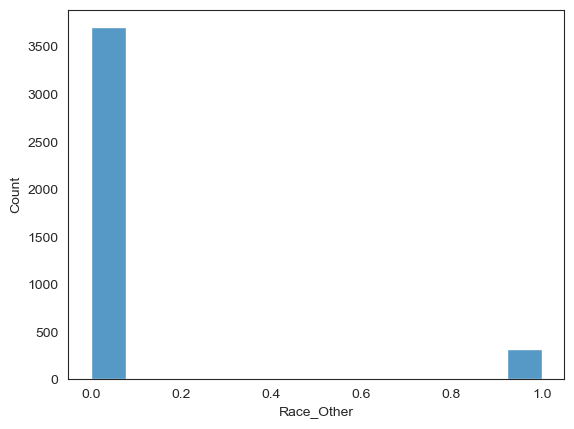

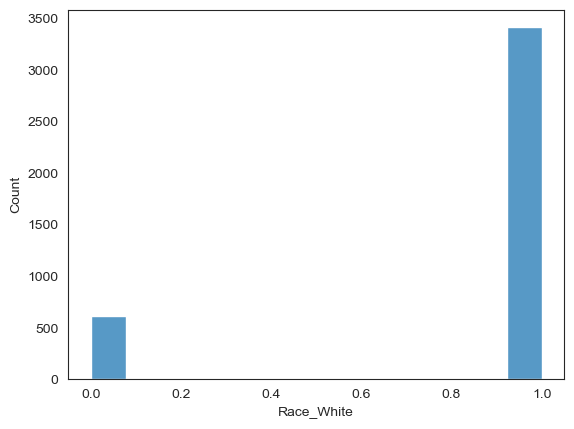

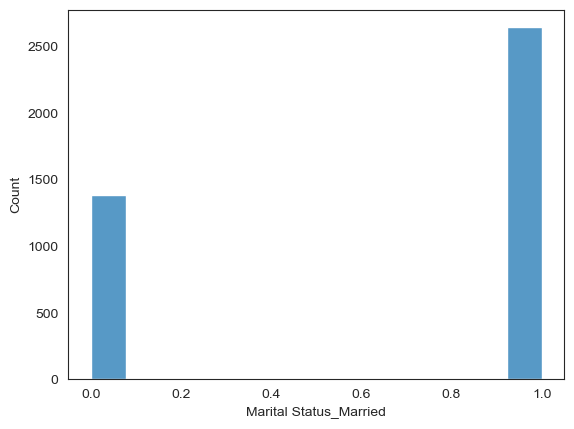

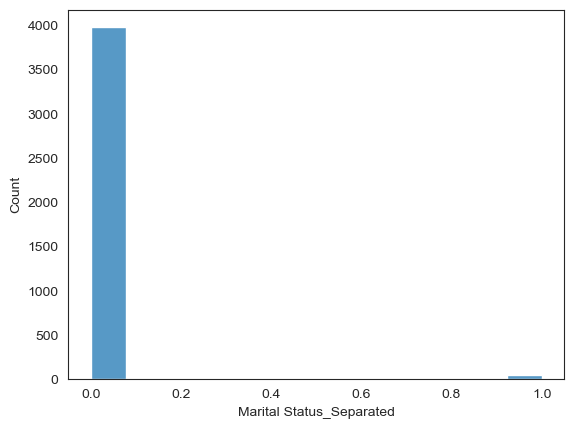

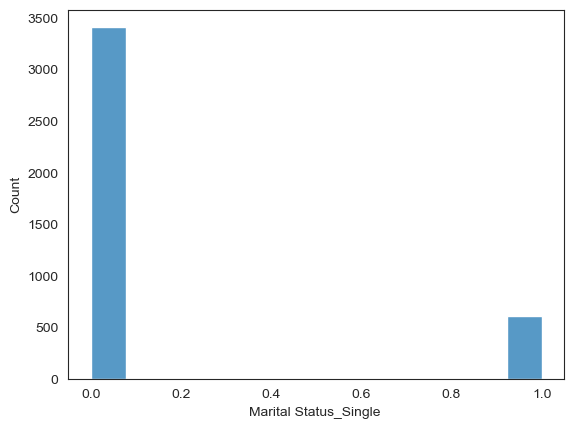

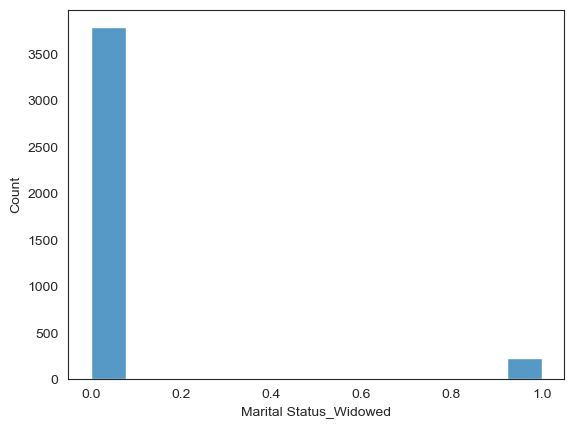

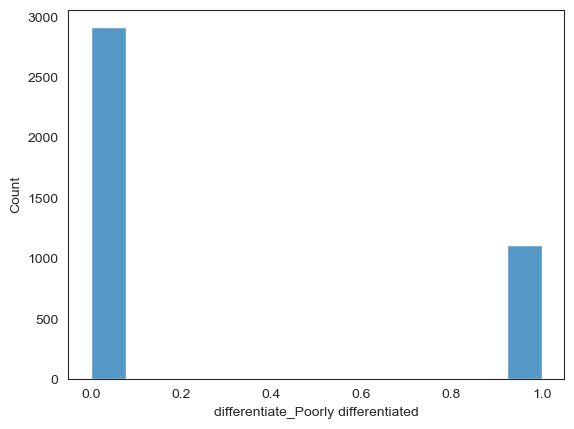

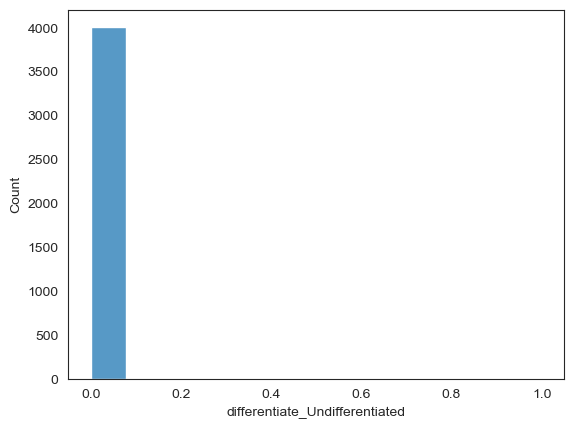

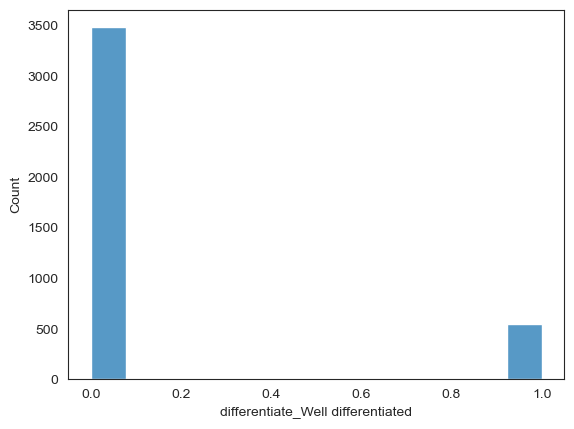

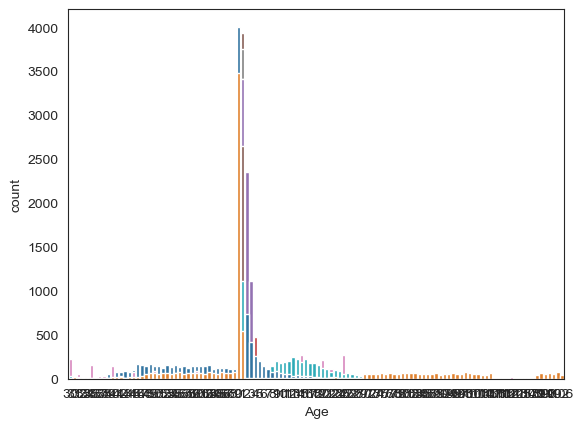

In [1054]:
sns.color_palette('blend:0.1,blue,0.9', as_cmap=True)
sns.set_style('white')
for i in df.columns: 
    sns.histplot(x=df[i]) 
    plt.show() 
for i in df.columns: 
    sns.countplot(x=df[i]) 

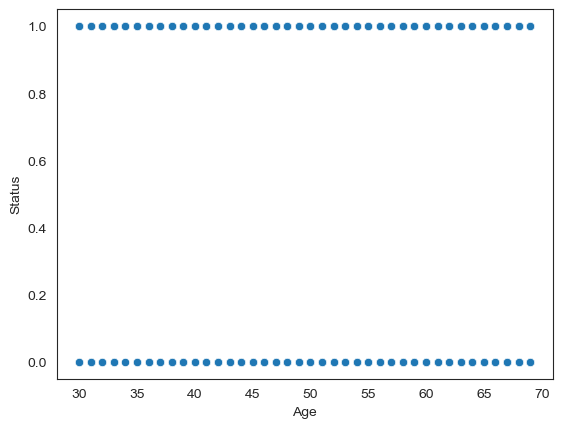

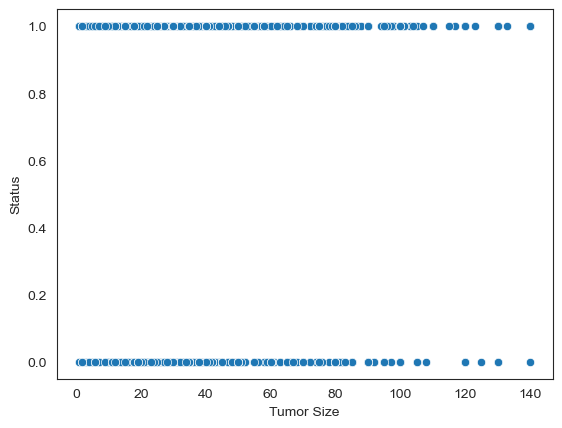

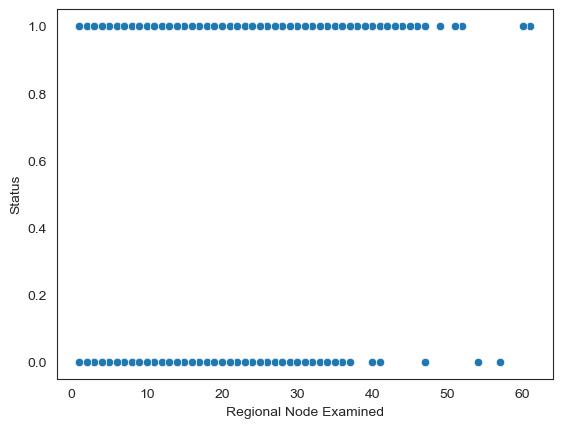

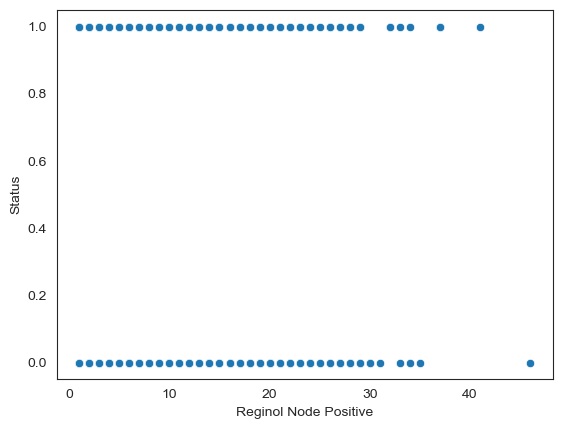

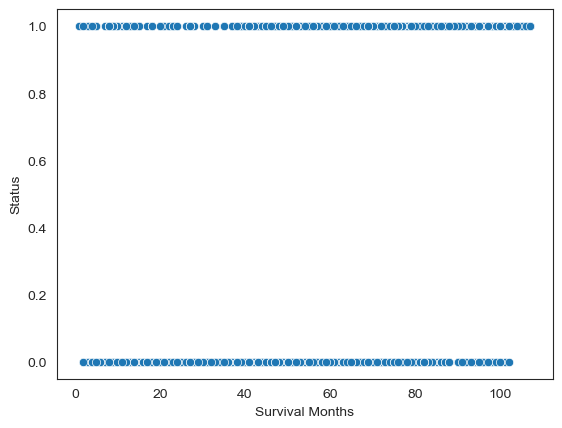

In [1055]:
#sns.pairplot(df[num_cols]) 
#plt.show() f
for i in num_col: 
    sns.scatterplot(x=df_new[i],y=df["Status"],palette="Set8")
    plt.show() 

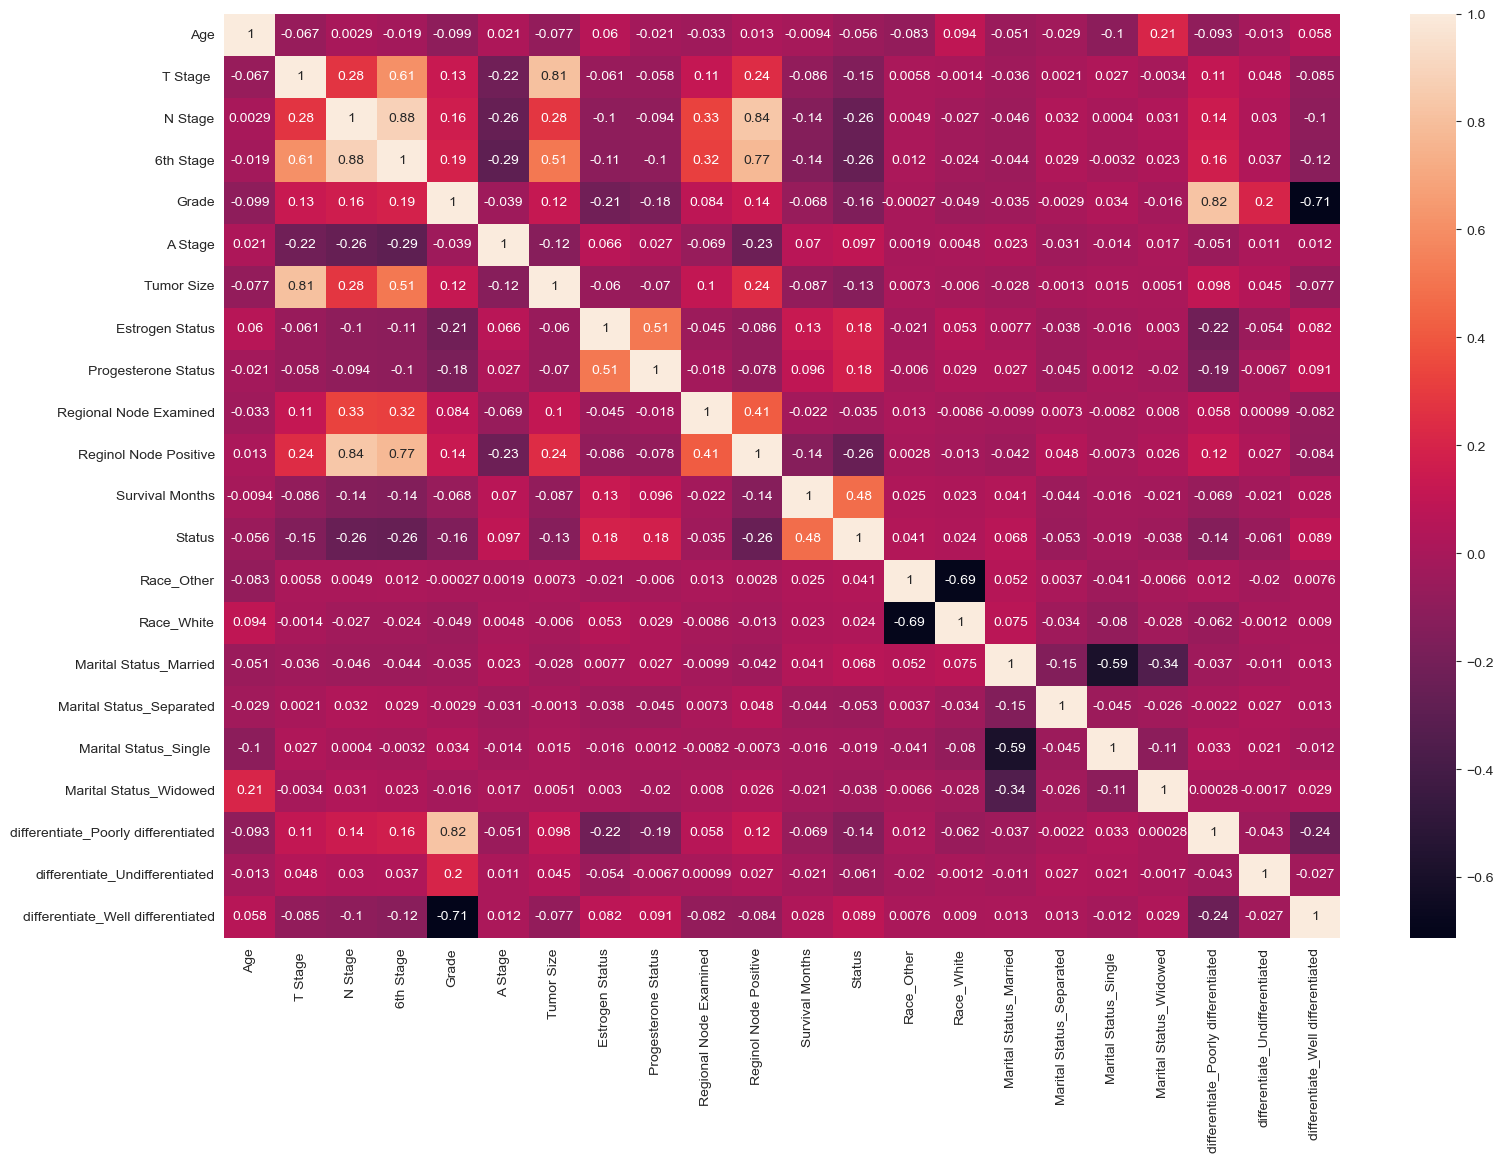

In [1056]:
plt.figure(figsize=(18,12)) 
sns.heatmap(df.corr(),annot=True) 
plt.show()

In [1057]:
from sklearn.model_selection import train_test_split

In [1058]:
df_train,df_test = train_test_split(df, train_size=0.7,random_state=100)

In [1059]:
df_train.shape,df_test.shape

((2816, 22), (1208, 22))

In [1066]:
# Putting feature variable to X
X_train= df_train.drop('Status',axis=1)
X_test=df_test.drop('Status',axis=1)
# Putting response variable to y
y_train = df_train['Status']
y_test= df_test['Status']

In [1068]:
from sklearn.tree import DecisionTreeClassifier

In [1070]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [1072]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [1074]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns, 
                class_names=['Alive', "Dead"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [1075]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [1076]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [1077]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[ 446,    0],
       [   0, 2370]])

In [1082]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.8675496688741722


array([[105,  65],
       [ 95, 943]])

In [1084]:
from sklearn.model_selection import GridSearchCV

In [1086]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [1088]:
# Instantiate the grid search model
grid_search= GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [1090]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 134 ms, sys: 157 ms, total: 291 ms
Wall time: 1.82 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [1091]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.008666      0.003752         0.002008        0.000448   
1       0.009113      0.001269         0.001952        0.000674   
2       0.009762      0.001751         0.001961        0.000532   
3       0.003126      0.000864         0.001310        0.000551   
4       0.002165      0.000202         0.000757        0.000078   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.913352   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.913352   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.913352   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.913352   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.913352   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.892045            0.90767           0.882102         0.898793   
1           0.892045            0.90767           0.882102         0.898793   
2           0.892045            0.90767           0.882102         0.898793   
3           0.892045            0.90767           0.882102         0.898793   
4           0.892045            0.90767           0.882102         0.898793   

   std_test_score  rank_test_score  
0        0.012399                5  
1        0.012399                5  
2        0.012399                5  
3        0.012399                5  
4        0.012399                5

In [1094]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
42       0.004248      0.000290         0.000955        0.000137   
47       0.004257      0.000254         0.000780        0.000106   
17       0.005858      0.001417         0.001691        0.000511   
22       0.005120      0.000233         0.001343        0.000522   
0        0.008666      0.003752         0.002008        0.000448   

   param_criterion param_max_depth param_min_samples_leaf  \
42         entropy              10                     20   
47         entropy              20                     20   
17            gini              10                     20   
22            gini              20                     20   
0             gini               2                      5   

                                               params  split0_test_score  \
42  {'criterion': 'entropy', 'max_depth': 10, 'min...           0.916193   
47  {'criterion': 'entropy', 'max_depth': 20, 'min...           0.916193   
17  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.916193   
22  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.916193   
0   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.913352   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
42           0.889205           0.901989           0.892045         0.899858   
47           0.889205           0.901989           0.892045         0.899858   
17           0.887784           0.906250           0.886364         0.899148   
22           0.887784           0.906250           0.886364         0.899148   
0            0.892045           0.907670           0.882102         0.898793   

    std_test_score  rank_test_score  
42        0.010558                1  
47        0.010558                1  
17        0.012585                3  
22        0.012585                3  
0         0.012399                5

In [1096]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20)

In [1098]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X_train.columns, 
                    class_names=['Alive', "Dead"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [1100]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [1102]:
dt_best = grid_search.best_estimator_

In [1104]:
evaluate_model(dt_best)

Train Accuracy : 0.90625
Train Confusion Matrix:
[[ 233  213]
 [  51 2319]]
--------------------------------------------------
Test Accuracy : 0.902317880794702
Test Confusion Matrix:
[[ 91  79]
 [ 39 999]]


In [1106]:
# Instantiate the grid search model
grid_search= GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = 'f1_weighted')

In [1108]:
%%time
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
CPU times: user 153 ms, sys: 76.6 ms, total: 229 ms
Wall time: 337 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='f1_weighted', verbose=1)

In [1110]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.013232      0.004494         0.007011        0.001230   
1       0.009685      0.005841         0.004700        0.002717   
2       0.009278      0.007743         0.002385        0.000874   
3       0.004052      0.000993         0.001494        0.000245   
4       0.003193      0.000800         0.001397        0.000102   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.912067   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.912067   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.912067   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.912067   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.912067   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0            0.88501           0.889684            0.89841            0.87576   
1            0.88501           0.889684            0.89841            0.87576   
2            0.88501           0.889684            0.89841            0.87576   
3            0.88501           0.889684            0.89841            0.87576   
4            0.88501           0.889684            0.89841            0.87576   

   mean_test_score  std_test_score  rank_test_score  
0         0.892186        0.012341                1  
1         0.892186        0.012341                1  
2         0.892186        0.012341                1  
3         0.892186        0.012341                1  
4         0.892186        0.012341                1

In [1112]:
dt_best_f1 = grid_search.best_estimator_

In [1114]:
evaluate_model(dt_best_f1)

Train Accuracy : 0.8987926136363636
Train Confusion Matrix:
[[ 244  202]
 [  83 2287]]
--------------------------------------------------
Test Accuracy : 0.9006622516556292
Test Confusion Matrix:
[[ 98  72]
 [ 48 990]]


In [1116]:
from sklearn.metrics import classification_report
classification_rep = classification_report(y_test, y_test_pred.reshape(-1))
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57       170
           1       0.94      0.91      0.92      1038

    accuracy                           0.87      1208
   macro avg       0.73      0.76      0.74      1208
weighted avg       0.88      0.87      0.87      1208

